# Exploration Exercises


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords
from env import user, password, host
from wordcloud import WordCloud

## 1. Spam Data

### a. Load the spam data set.


In [2]:
#acquire data from spam_db

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
### c. Is there any overlap in the bigrams for the spam data and the ham data?


In [3]:
# df['clean'] = df['text'].apply(basic_clean).apply(tokenize).apply(remove_stopwords)
# df['stemmed'] = df['clean'].apply(stem)
# df['lemmatized'] = df['clean'].apply(lemmatize)

In [4]:
spam_words = basic_clean(' '.join(df[df.label == 'spam'].text))
ham_words = basic_clean(' '.join(df[df.label == 'ham'].text))

(-0.5, 799.5, 599.5, -0.5)

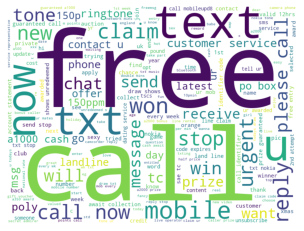

In [5]:
# spam words word cloud
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

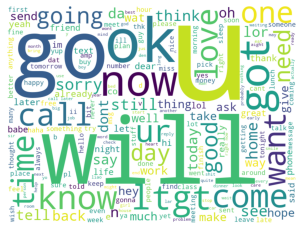

In [6]:
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

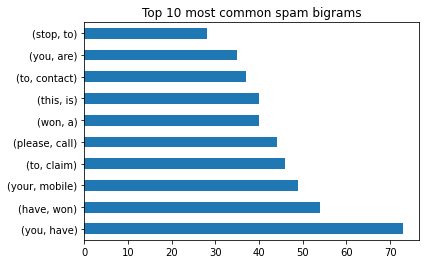

In [7]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')


Text(0.5, 1.0, 'Top 10 most common ham bigrams')

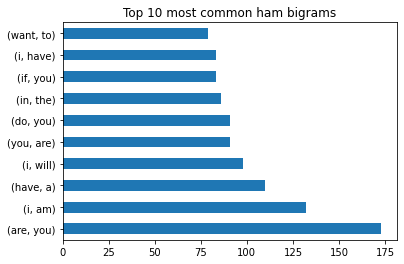

In [8]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

In [9]:
all_words = basic_clean(' '.join(df.text))
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [10]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [11]:
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,755,29,784


Text(0.5, 1.0, 'Ham vs Spam count for the top 20 most frequent words')

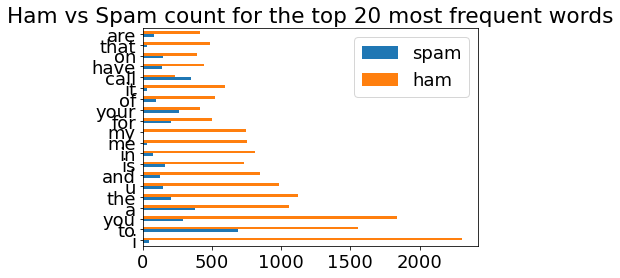

In [12]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
plt.title('Ham vs Spam count for the top 20 most frequent words')

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [13]:
list(nltk.trigrams(ham_words.split()))

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'there'),
 ('cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'nah'),
 ('say', 'nah', 'i'),
 ('nah', 'i', "don't"),
 ('i', "don't", 'thin

In [14]:
list(nltk.trigrams(spam_words.split()))

[('free', 'entry', 'in'),
 ('entry', 'in', '2'),
 ('in', '2', 'a'),
 ('2', 'a', 'wkly'),
 ('a', 'wkly', 'comp'),
 ('wkly', 'comp', 'to'),
 ('comp', 'to', 'win'),
 ('to', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', 'to'),
 ('fa', 'to', '87121'),
 ('to', '87121', 'to'),
 ('87121', 'to', 'receive'),
 ('to', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', "ratetc's"),
 ('txt', "ratetc's", 'apply'),
 ("ratetc's", 'apply', "08452810075over18's"),
 ('apply', "08452810075over18's", 'freemsg'),
 ("08452810075over18's", 'freemsg', 'hey'),
 ('freemsg', 'hey', 'there'),
 ('hey', 'there', 'darling'),
 ('there', 'darling', "it's"),
 ('darling', "it's", 'been'),
 ("it's", 'been', '3'),
 ('been', '3', "week's"),
 ('3', "week's", 'now'),
 ("week'

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.


In [15]:
import acquire
df = acquire.acquire_blogs()

In [16]:
df.head()

,title,content
0,Codeup Dallas Open House - Codeup,\nCome join us for the re-opening of our Dalla...
1,Codeup Helps 40 Grads Land Tech Jobs in Just 1...,\n\n\n\n\n\nOur Placement Team is simply defin...
2,"IT Certifications 101: Why They Matter, and Wh...","\n\n\n\n\n\nAWS, Google, Azure, Red Hat, CompT..."
3,A rise in cyber attacks means opportunities fo...,"\nIn the last few months, the US has experienc..."
4,Use your GI Bill® benefits to Land a Job in Te...,\n\n\n\n\n\nAs the end of military service get...


In [17]:
all_words = basic_clean(' '.join(df.content))

In [18]:
all_words = re.sub('[\n]','', all_words)

In [19]:
all_words = remove_stopwords(all_words)

In [20]:
all_freq = pd.Series(all_words.split()).value_counts()

In [21]:
all_freq.sort_values(ascending=False).head(20)

tech              50
codeup            38
career            31
get               28
students          26
like              25
us                24
hired             23
job               21
systems           21
bootcamp          21
programs          20
one               19
san               19
skills            18
certifications    18
software          17
program           16
antonio           16
system            16
dtype: int64

Top words that pop out are tech, codeup, career, students, hired, job, programs, bootcamp.

### n-grams

In [22]:
list(nltk.bigrams(all_words.split()))

[('come', 'join'),
 ('join', 'us'),
 ('us', 'reopening'),
 ('reopening', 'dallas'),
 ('dallas', 'campus'),
 ('campus', 'drinks'),
 ('drinks', 'snacks'),
 ('snacks', 'codeup'),
 ('codeup', 'curious'),
 ('curious', 'campus'),
 ('campus', 'looks'),
 ('looks', 'like'),
 ('like', 'click'),
 ('click', 'register'),
 ('register', 'freeabout'),
 ('freeabout', 'eventcome'),
 ('eventcome', 'join'),
 ('join', 'us'),
 ('us', 'reopening'),
 ('reopening', 'dallas'),
 ('dallas', 'campus'),
 ('campus', 'drinks'),
 ('drinks', 'snacks'),
 ('snacks', 'codeupcurious'),
 ('codeupcurious', 'campus'),
 ('campus', 'looks'),
 ('looks', 'like'),
 ('like', 'interested'),
 ('interested', 'web'),
 ('web', 'development'),
 ('development', 'career'),
 ('career', 'accelerator'),
 ('accelerator', 'keen'),
 ('keen', 'chat'),
 ('chat', 'instructor'),
 ('instructor', 'financial'),
 ('financial', 'aid'),
 ('aid', 'repat'),
 ('repat', 'open'),
 ('open', 'house'),
 ('house', 'answer'),
 ('answer', 'questionsmeet'),
 ('questi

Text(0.5, 1.0, 'Top 10 most common bigrams in Codeup blogs')

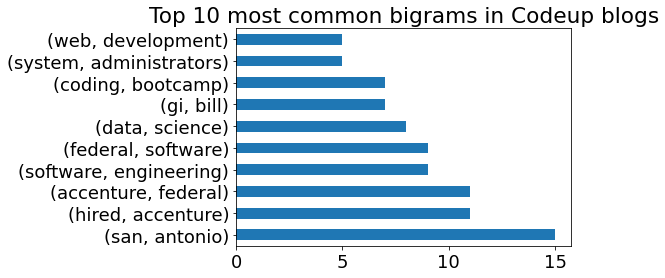

In [23]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams in Codeup blogs')

(-0.5, 799.5, 599.5, -0.5)

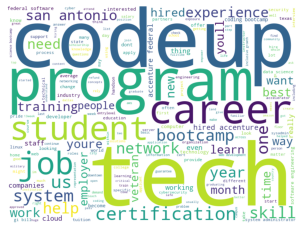

In [24]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'Top 10 most common trigrams in Codeup blogs')

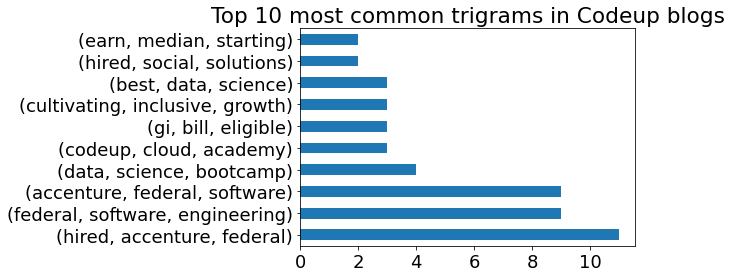

In [25]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common trigrams in Codeup blogs')

In [26]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df.content.apply(len)

df['word_count'] = df.content.apply(basic_clean).apply(str.split).apply(len)

df.head()

,title,content,message_length,word_count
0,Codeup Dallas Open House - Codeup,\nCome join us for the re-opening of our Dalla...,927,163
1,Codeup Helps 40 Grads Land Tech Jobs in Just 1...,\n\n\n\n\n\nOur Placement Team is simply defin...,2156,331
2,"IT Certifications 101: Why They Matter, and Wh...","\n\n\n\n\n\nAWS, Google, Azure, Red Hat, CompT...",3602,595
3,A rise in cyber attacks means opportunities fo...,"\nIn the last few months, the US has experienc...",2300,371
4,Use your GI Bill® benefits to Land a Job in Te...,\n\n\n\n\n\nAs the end of military service get...,6053,965


In [27]:
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores(all_words)

{'neg': 0.028, 'neu': 0.773, 'pos': 0.199, 'compound': 1.0}

In [28]:
df['sentiment'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,title,content,message_length,word_count,sentiment
0,Codeup Dallas Open House - Codeup,\nCome join us for the re-opening of our Dalla...,927,163,0.9867
1,Codeup Helps 40 Grads Land Tech Jobs in Just 1...,\n\n\n\n\n\nOur Placement Team is simply defin...,2156,331,0.9671
2,"IT Certifications 101: Why They Matter, and Wh...","\n\n\n\n\n\nAWS, Google, Azure, Red Hat, CompT...",3602,595,0.9951
3,A rise in cyber attacks means opportunities fo...,"\nIn the last few months, the US has experienc...",2300,371,0.9949
4,Use your GI Bill® benefits to Land a Job in Te...,\n\n\n\n\n\nAs the end of military service get...,6053,965,0.9986
5,Which program is right for me: Cyber Security ...,\n\n\n\n\n\nWhat IT Career should I choose?\nI...,2746,450,0.9749
6,What the Heck is System Engineering? - Codeup,\n\n\n\n\n\nCodeup offers a 13-week training p...,3756,594,0.9814
7,From Speech Pathology to Business Intelligence...,\n\n\n\n\n\nBy: Alicia Gonzalez\nBefore Codeup...,3582,663,0.9992
8,Boris - Behind the Billboards - Codeup,\n\n\n,3,0,0.0000
9,Is Codeup the Best Bootcamp in San Antonio...o...,\n\n\n\n\n\nLooking for the best data science ...,2662,444,0.9951


In [29]:
df.sentiment.agg(['mean','median'])

mean      0.9219
median    0.9949
Name: sentiment, dtype: float64

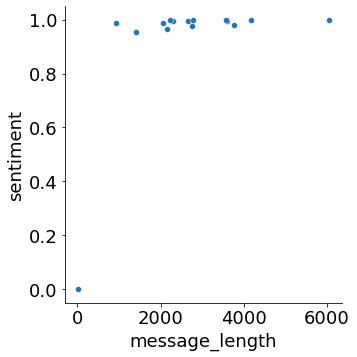

In [30]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='Density'>

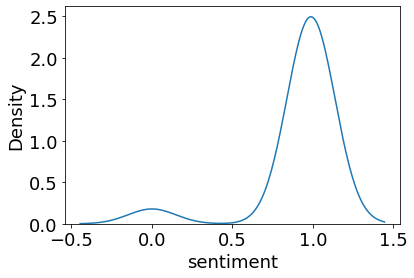

In [31]:
# sentiment distribution
sns.kdeplot(df.sentiment)


## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [32]:
df = acquire.acquire_news()

In [33]:
df.head()

,title,author,content,category
0,RBI cancels licence of Maha-based Independence...,Shalini Ojha,RBI has cancelled licence of Maharashtra-based...,business
1,Boost to EVs a big step: Windmill Capital,Roshan Gupta,"Increased use of EVs in public transport, spec...",business
2,Facebook parent Meta's $230-billion wipeout bi...,Pragya Swastik,Facebook's parent Meta's shares plunged 27% an...,business
3,Facebook's daily active users fall for first t...,Pragya Swastik,Facebook has seen its daily active users (DAUs...,business
4,"Tesla co-worker used N-word, threw a hot tool ...",Kiran Khatri,A former Tesla worker has filed a lawsuit agai...,business


In [34]:
all_words = basic_clean(' '.join(df.content))

In [35]:
all_words = re.sub('[\n]','', all_words)

In [36]:
all_words = remove_stopwords(all_words,['said','us'])

In [37]:
all_freq = pd.Series(all_words.split()).value_counts()

In [38]:
all_freq.sort_values(ascending=False).head(20)

added       37
billion     31
fell        16
time        15
also        15
revenue     14
team        12
company     12
actress     11
actor       11
reported    11
first       11
facebook    10
thursday    10
india       10
wrote       10
shares      10
one         10
crore       10
market      10
dtype: int64

### n-grams

In [39]:
list(nltk.bigrams(all_words.split()))

[('rbi', 'cancelled'),
 ('cancelled', 'licence'),
 ('licence', 'maharashtrabased'),
 ('maharashtrabased', 'independence'),
 ('independence', 'cooperative'),
 ('cooperative', 'bank'),
 ('bank', 'citing'),
 ('citing', 'inadequate'),
 ('inadequate', 'capital'),
 ('capital', 'cease'),
 ('cease', 'carry'),
 ('carry', 'banking'),
 ('banking', 'operations'),
 ('operations', 'close'),
 ('close', 'business'),
 ('business', 'february'),
 ('february', '3'),
 ('3', 'present'),
 ('present', 'situation'),
 ('situation', 'bank'),
 ('bank', 'able'),
 ('able', 'pay'),
 ('pay', 'depositors'),
 ('depositors', 'full'),
 ('full', 'rbi'),
 ('rbi', 'added'),
 ('added', 'bank'),
 ('bank', 'comply'),
 ('comply', 'multiple'),
 ('multiple', 'sections'),
 ('sections', 'banking'),
 ('banking', 'regulation'),
 ('regulation', 'act'),
 ('act', '1949'),
 ('1949', 'increased'),
 ('increased', 'use'),
 ('use', 'evs'),
 ('evs', 'public'),
 ('public', 'transport'),
 ('transport', 'special'),
 ('special', 'mobility'),
 ('m

Text(0.5, 1.0, 'Top 10 most common bigrams in Codeup blogs')

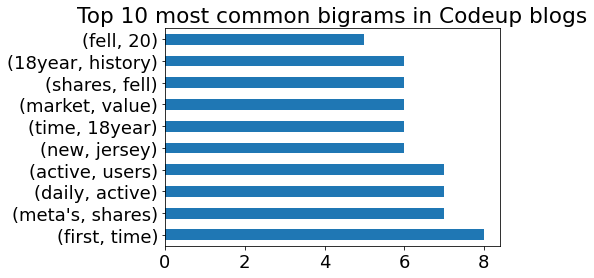

In [40]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams in Codeup blogs')

(-0.5, 799.5, 599.5, -0.5)

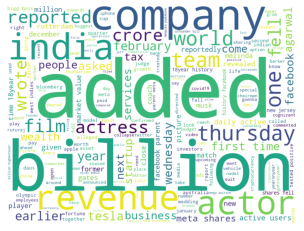

In [41]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'Top 10 most common trigrams in Codeup blogs')

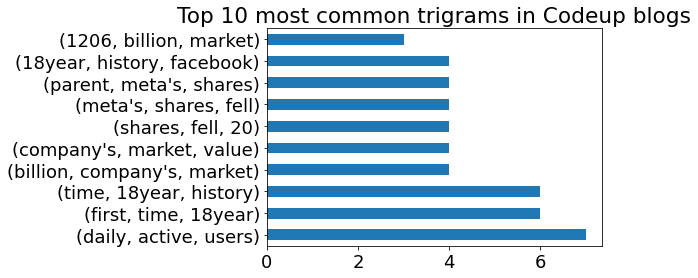

In [42]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common trigrams in Codeup blogs')

In [43]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores(all_words)

{'neg': 0.076, 'neu': 0.769, 'pos': 0.155, 'compound': 0.9998}

In [44]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df.content.apply(len)

df['word_count'] = df.content.apply(basic_clean).apply(str.split).apply(len)

df.head()

,title,author,content,category,message_length,word_count
0,RBI cancels licence of Maha-based Independence...,Shalini Ojha,RBI has cancelled licence of Maharashtra-based...,business,376,60
1,Boost to EVs a big step: Windmill Capital,Roshan Gupta,"Increased use of EVs in public transport, spec...",business,394,59
2,Facebook parent Meta's $230-billion wipeout bi...,Pragya Swastik,Facebook's parent Meta's shares plunged 27% an...,business,367,59
3,Facebook's daily active users fall for first t...,Pragya Swastik,Facebook has seen its daily active users (DAUs...,business,357,60
4,"Tesla co-worker used N-word, threw a hot tool ...",Kiran Khatri,A former Tesla worker has filed a lawsuit agai...,business,388,59


In [45]:
df['sentiment'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,title,author,content,category,message_length,word_count,sentiment
0,RBI cancels licence of Maha-based Independence...,Shalini Ojha,RBI has cancelled licence of Maharashtra-based...,business,376,60,-0.6249
1,Boost to EVs a big step: Windmill Capital,Roshan Gupta,"Increased use of EVs in public transport, spec...",business,394,59,0.9517
2,Facebook parent Meta's $230-billion wipeout bi...,Pragya Swastik,Facebook's parent Meta's shares plunged 27% an...,business,367,59,-0.1280
3,Facebook's daily active users fall for first t...,Pragya Swastik,Facebook has seen its daily active users (DAUs...,business,357,60,0.7430
4,"Tesla co-worker used N-word, threw a hot tool ...",Kiran Khatri,A former Tesla worker has filed a lawsuit agai...,business,388,59,-0.8625
...,...,...,...,...,...,...,...
95,iPhone sales in India rise 34% to record 2.3 m...,Aishwarya Awasthi,Apple's iPhone sales in India rose 34% in the ...,technology,370,59,0.3400
96,Lawsuit over Apple's iPhone water resistance c...,Aishwarya Awasthi,A US judge on Wednesday dismissed a lawsuit ag...,technology,371,58,-0.5859
97,Australian billionaire sues Facebook over scam...,Aishwarya Awasthi,Australian billionaire Andrew Forrest has sued...,technology,363,60,-0.8885
98,Crypto tax will help measure the depth of the ...,Ashley Paul,Central Board of Direct Taxes Chairman JB Moha...,technology,333,58,0.5994


In [46]:
df.sentiment.agg(['mean','median'])

mean      0.240199
median    0.391850
Name: sentiment, dtype: float64

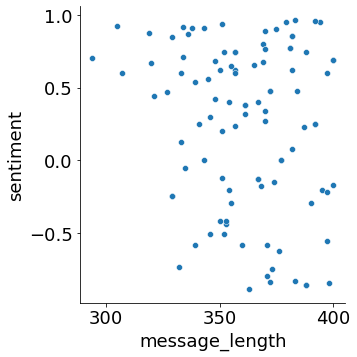

In [47]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='Density'>

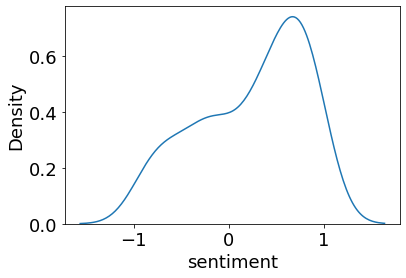

In [48]:
# sentiment distribution
sns.kdeplot(df.sentiment)